## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate

## Import and Analysis of data

In [2]:
card_data = pd.read_csv('creditcard.csv\creditcard.csv')
print(card_data.shape)
X = card_data.iloc[:, :-1]
Y = card_data.iloc[:, -1]

(284807, 31)


In [3]:
#Check missing values
weight_nf = card_data['Class'].value_counts()[0] / len(card_data)
weight_f = card_data['Class'].value_counts()[1] / len(card_data)
nf = card_data["Class"].value_counts()[0]
f = card_data["Class"].value_counts()[1]
print(f"Non-Fraud weight: {weight_nf}")
print(f"Fraud weight: {weight_f}")
print(f"Non Fraud Count: {nf}")
print(f"Fraud Count: {f}")

Non-Fraud weight: 0.9982725143693799
Fraud weight: 0.001727485630620034
Non Fraud Count: 284315
Fraud Count: 492


In [4]:
card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Check for null values
card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

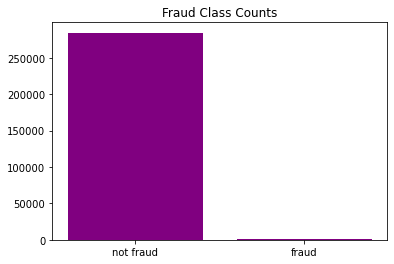

In [6]:
#Plot Fraud vs Not Fraud transaction counts
fraud_count = card_data["Class"].value_counts()
plt.figure()
plt.title("Fraud Class Counts")
plt.bar(fraud_count.index,fraud_count.values,color='purple')
plt.xticks([0,1], labels=["not fraud","fraud"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

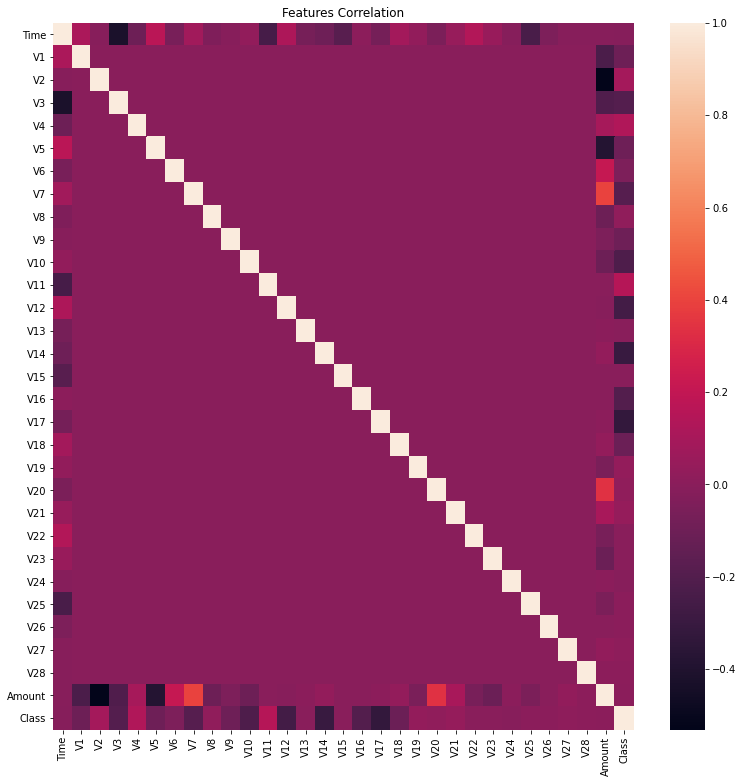

In [7]:
#Plot features correlation
plt.figure(figsize = (13,13))
corr = card_data.corr()
plt.title("Features Correlation")
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show

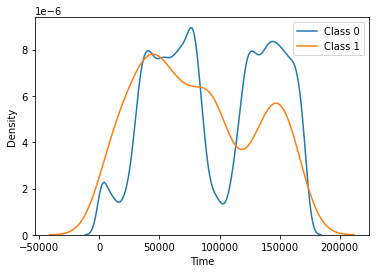

In [8]:
#Transaction Time density plot
notFraud_time = card_data.loc[card_data["Class"]==0]
fraud_time = card_data.loc[card_data["Class"]==1]
plt.figure()
sb.kdeplot(data = notFraud_time["Time"], label = "Class 0")
sb.kdeplot(data = fraud_time["Time"], label = "Class 1")
plt.legend()
plt.show()

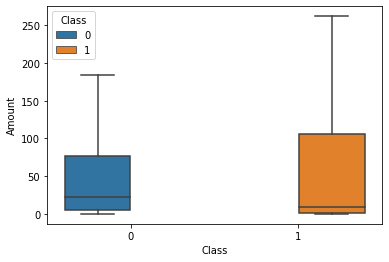

In [9]:
sb.boxplot(x = "Class", y = "Amount", hue = "Class", data = card_data, showfliers = False)
plt.show()

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

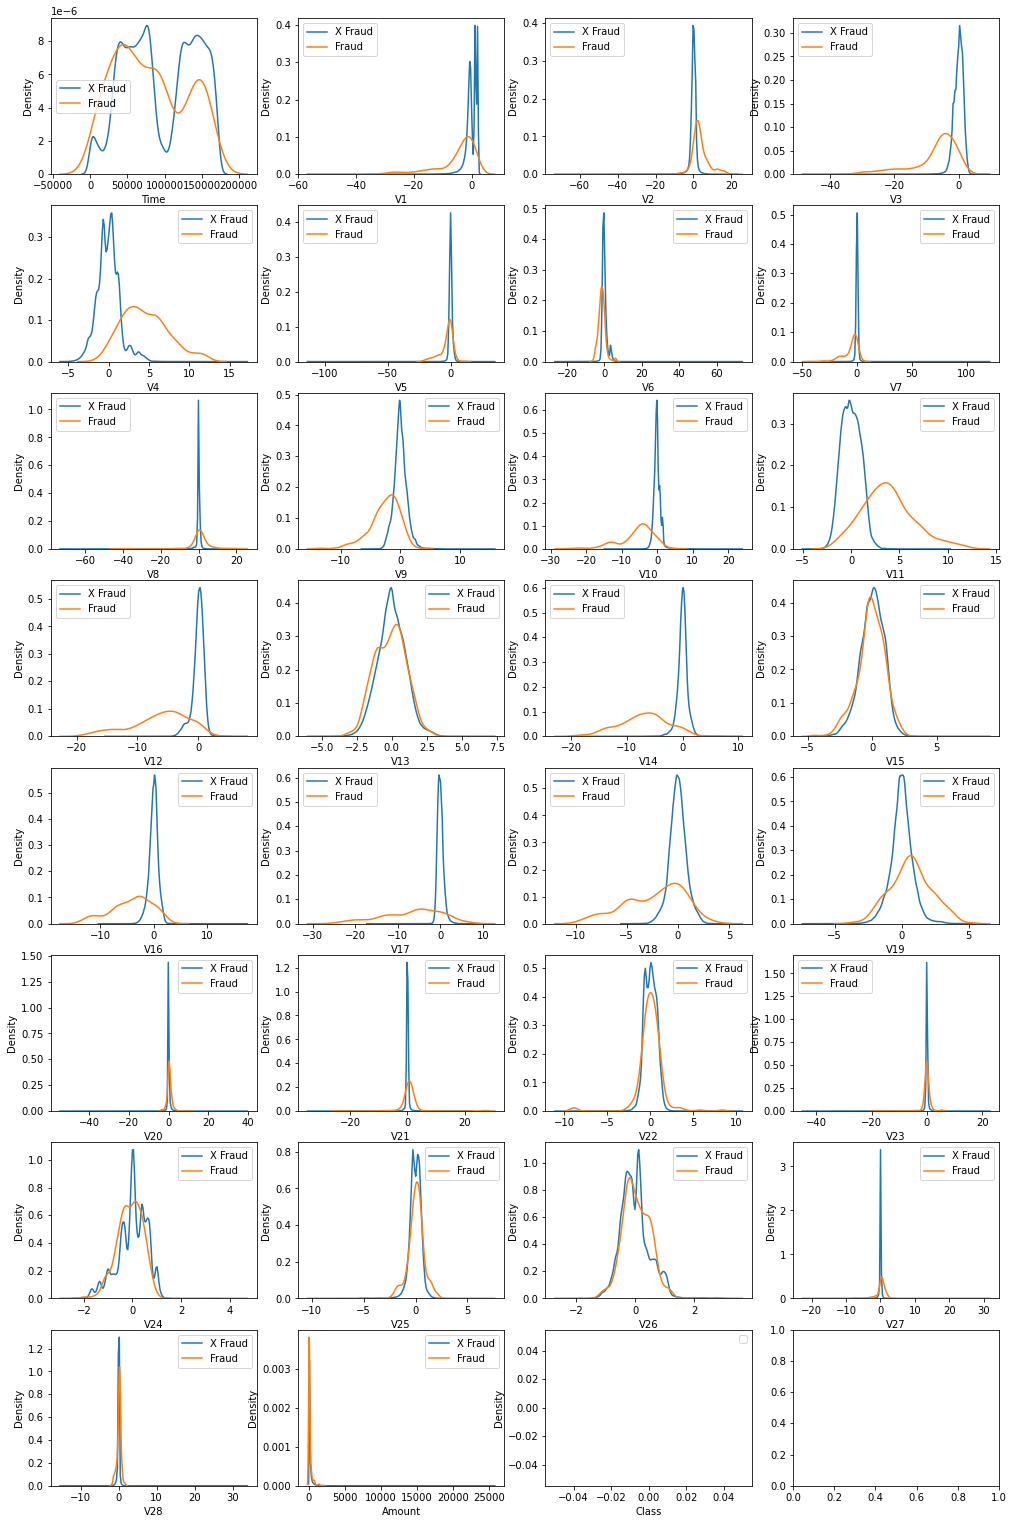

In [10]:
#Features density plot
col = card_data.columns.values
c0 = card_data.loc[card_data["Class"] == 0]
c1 = card_data.loc[card_data["Class"] == 1]
x = 0
plt.figure()
plt.subplots(8,4,figsize=(17,27))

for feature in col:
    x += 1
    plt.subplot(8,4,x)
    sb.kdeplot(data = c0[feature], label = "X Fraud")
    sb.kdeplot(data = c1[feature], label = "Fraud")
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

## Data Preprocessing

In [11]:
#Split dataset into test train and valid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.25, random_state = 5)

In [12]:
ct = ColumnTransformer([
        ('std', StandardScaler(), ['Amount', 'Time'])
    ], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [13]:
weight_nf = y_train.value_counts()[0] / len(y_train)
weight_f = y_train.value_counts()[1] / len(y_train)
print(f"Non-Fraud weight: {weight_nf}")
print(f"Fraud weight: {weight_f}")

Non-Fraud weight: 0.9982725123475574
Fraud weight: 0.0017274876524425926


In [14]:
print(f"Train Data shape: {x_train.shape} Train Class Data shape: {y_train.shape}")
print(f"Test Data shape: {x_test.shape} Test Class Data shape: {y_test.shape}")

Train Data shape: (213605, 30) Train Class Data shape: (213605,)
Test Data shape: (71202, 30) Test Class Data shape: (71202,)


## Random Forest Classifier

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, matthews_corrcoef


def print_classification_result(true, predict):
    print(f"Accuracy Score\n: {accuracy_score(true, predict) * 100:.2f}%")
    print(f"Confusion Matrix: \n {confusion_matrix(true, predict)}\n")
    print(f"MCC_Score\n:{matthews_corrcoef(true, predict)}\n")
    print(f"f1_score: \n {f1_score(true, predict)}\n")
    print(f"recall_score: \n {recall_score(true, predict)}\n")
    print(f"Precision_Score\n:{precision_score(true, predict)}")

def print_cross_val_result(cv):
    print(f"Accuracy Score: \n{cv['test_accuracy'].mean()}\n")
    print(f"f1_score: \n{cv['test_f1'].mean()}\n")
    print(f"recall_score: \n{cv['test_recall'].mean()}\n")
    print(f"Precision_Score: \n{cv['test_precision'].mean()}")

In [45]:
from sklearn.ensemble import RandomForestClassifier
randfclassifier = RandomForestClassifier(n_estimators = 100, criterion = "gini")
randfclassifier.fit(x_train, y_train)
y_test_pred_randf = randfclassifier.predict(x_test)
print_classification_result(y_test, y_test_pred_randf)

Accuracy Score
: 99.96%
Confusion Matrix: 
 [[71077     2]
 [   26    97]]

MCC_Score
:0.8788459941452819

f1_score: 
 0.8738738738738739

recall_score: 
 0.7886178861788617

Precision_Score
:0.9797979797979798


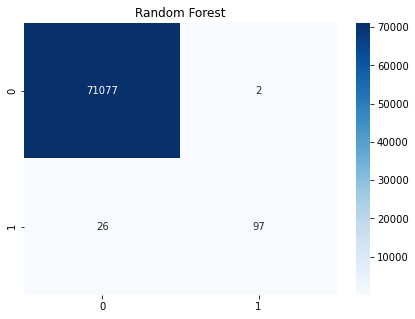

In [46]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_randf), annot=True, cmap='Blues', fmt='d')
cm.set_title('Random Forest')
plt.show()

In [18]:
randfclassifier = RandomForestClassifier(n_estimators = 100, criterion = "gini")
cv = cross_validate(randfclassifier, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [19]:
print_cross_val_result(cv)

Accuracy Score: 
0.9995224830879428

f1_score: 
0.8483160181310303

recall_score: 
0.77238059977786

Precision_Score: 
0.9412915824319017


In [20]:
randfclassifier = RandomForestClassifier(n_estimators = 200, criterion = "gini")
cv = cross_validate(randfclassifier, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [21]:
print_cross_val_result(cv)

Accuracy Score: 
0.9995084384728822

f1_score: 
0.8439257504555296

recall_score: 
0.7696778970751573

Precision_Score: 
0.9344229217110573


In [22]:
randfclassifier = RandomForestClassifier(n_estimators = 300, criterion = "gini")
cv = cross_validate(randfclassifier, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [23]:
print_cross_val_result(cv)

Accuracy Score: 
0.9995131200112356

f1_score: 
0.8456394921248409

recall_score: 
0.77238059977786

Precision_Score: 
0.9347701439332795


In [24]:
randfclassifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", bootstrap = False)
cv = cross_validate(randfclassifier, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [25]:
print_cross_val_result(cv)

Accuracy Score: 
0.9995037569345288

f1_score: 
0.8422941489098019

recall_score: 
0.7669751943724545

Precision_Score: 
0.9343205151570378


## Kernel Support Vector Machine

In [19]:
from sklearn.svm import SVC
KSVM = SVC(kernel = "poly", C = 1)
KSVM.fit(x_train, y_train)
y_test_pred_KSVM = KSVM.predict(x_test)
print_classification_result(y_test, y_test_pred_KSVM)

Accuracy Score
: 99.95%
Confusion Matrix: 
 [[71076     3]
 [   35    88]]

MCC_Score
:0.8315455823267008

f1_score: 
 0.8224299065420562

recall_score: 
 0.7154471544715447

Precision_Score
:0.967032967032967


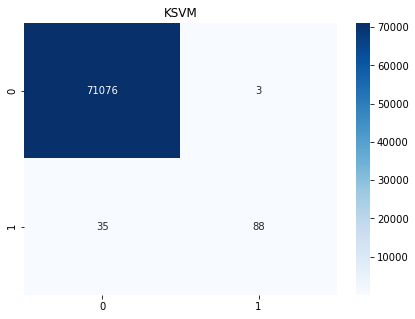

In [20]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_KSVM), annot=True, cmap="Blues", fmt="g")
cm.set_title('KSVM')
plt.show()

In [22]:
KSVM = SVC(kernel = "rbf", C = 1)
cv = cross_validate(KSVM, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [23]:
print_cross_val_result(cv)

Accuracy Score: 
0.9993445846305097

f1_score: 
0.778216816647919

recall_score: 
0.6667900777489818

Precision_Score: 
0.9345983095705627


In [24]:
KSVM = SVC(kernel = "rbf", C = 10)
cv = cross_validate(KSVM, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [25]:
print_cross_val_result(cv)

Accuracy Score: 
0.9994194892441657

f1_score: 
0.8045789824626006

recall_score: 
0.6965938541281007

Precision_Score: 
0.9540423861852434


In [15]:
from sklearn.svm import SVC
KSVM = SVC(kernel = "rbf", C = 0.1)
cv = cross_validate(KSVM, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [18]:
print_cross_val_result(cv)

Accuracy Score: 
0.998520633880293

f1_score: 
0.2745788055182938

recall_score: 
0.1624953720844132

Precision_Score: 
0.8971428571428571


In [26]:
KSVM = SVC(kernel = "poly")
cv = cross_validate(KSVM, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [27]:
print_cross_val_result(cv)

Accuracy Score: 
0.9994803492427611

f1_score: 
0.8341927772566453

recall_score: 
0.7614587189929656

Precision_Score: 
0.9251547107162473


In [28]:
KSVM = SVC(kernel = "linear")
cv = cross_validate(KSVM, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [29]:
print_cross_val_result(cv)

Accuracy Score: 
0.9993305400154491

f1_score: 
0.8016984903873358

recall_score: 
0.7804887078859682

Precision_Score: 
0.8256187906094723


## K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski")
knn.fit(x_train, y_train)
y_test_pred_KNN = knn.predict(x_test)
print_classification_result(y_test, y_test_pred_KNN)

Accuracy Score
: 99.96%
Confusion Matrix: 
 [[71075     4]
 [   27    96]]

MCC_Score
:0.8654004334528116

f1_score: 
 0.8609865470852018

recall_score: 
 0.7804878048780488

Precision_Score
:0.96


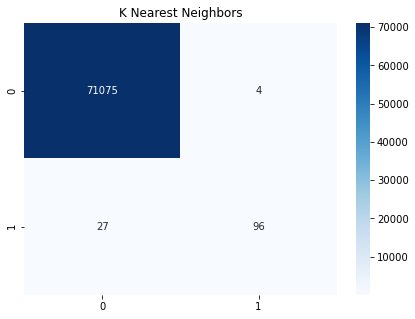

In [31]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_KNN), annot=True, cmap='Blues', fmt='d')
cm.set_title('K Nearest Neighbors')
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors = 4, p = 2, metric = "minkowski")
cv = cross_validate(knn, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [33]:
print_cross_val_result(cv)

Accuracy Score: 
0.9994897123194681

f1_score: 
0.8365117855736843

recall_score: 
0.7560903369122547

Precision_Score: 
0.9366787732041969


In [34]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski")
cv = cross_validate(knn, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [35]:
print_cross_val_result(cv)

Accuracy Score: 
0.9994897123194681

f1_score: 
0.8400695811551699

recall_score: 
0.7750833024805627

Precision_Score: 
0.9175583854873344


In [36]:
knn = KNeighborsClassifier(n_neighbors = 6, p = 2, metric = "minkowski")
cv = cross_validate(knn, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [37]:
print_cross_val_result(cv)

Accuracy Score: 
0.999461623089347

f1_score: 
0.8280403572447727

recall_score: 
0.7507589781562384

Precision_Score: 
0.9234863208520642


In [43]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 1, metric = "minkowski")
cv = cross_validate(knn, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [44]:
print_cross_val_result(cv)

Accuracy Score: 
0.9994709861660542

f1_score: 
0.8334795996109865

recall_score: 
0.7669751943724548

Precision_Score: 
0.9132236507896414


## Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_test_pred_NB = nb.predict(x_test)
print_classification_result(y_test, y_test_pred_NB)

Accuracy Score
: 97.75%
Confusion Matrix: 
 [[69495  1584]
 [   20   103]]

MCC_Score
:0.22255860511648434

f1_score: 
 0.1138121546961326

recall_score: 
 0.8373983739837398

Precision_Score
:0.06105512744516894


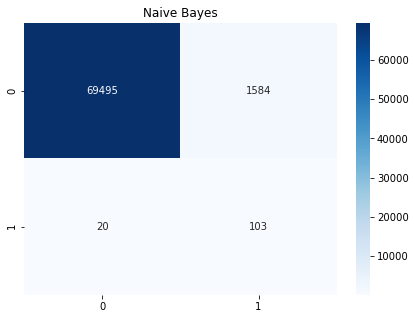

In [39]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_NB), annot=True, cmap='Blues', fmt='d')
cm.set_title('Naive Bayes')
plt.show()

## Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 10)
tree.fit(x_train, y_train)
y_test_pred_tree = tree.predict(x_test)
print(f"max depth of tree: {tree.tree_.max_depth}\n")
print_classification_result(y_test, y_test_pred_tree)

max depth of tree: 23

Accuracy Score
: 99.95%
Confusion Matrix: 
 [[71074     5]
 [   29    94]]

MCC_Score
:0.8516171831485875

f1_score: 
 0.846846846846847

recall_score: 
 0.7642276422764228

Precision_Score
:0.9494949494949495


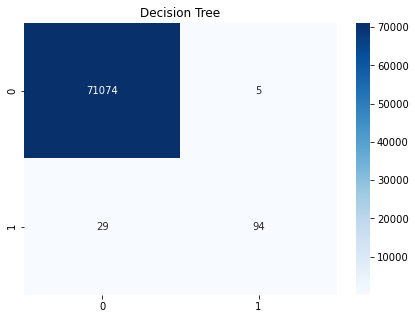

In [54]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_tree), annot=True, cmap='Blues', fmt='d')
cm.set_title('Decision Tree')
plt.show()

In [42]:
tree = DecisionTreeClassifier(criterion = "entropy")
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [43]:
print_cross_val_result(cv)

Accuracy Score: 
0.999124552327895

f1_score: 
0.7517575347301113

recall_score: 
0.7668271010736765

Precision_Score: 
0.7381881533101046


In [44]:
tree = DecisionTreeClassifier(criterion = "gini")
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [45]:
print_cross_val_result(cv)

Accuracy Score: 
0.9991479600196624

f1_score: 
0.7542235676401672

recall_score: 
0.7561273602369493

Precision_Score: 
0.7535262206148282


In [46]:
tree = DecisionTreeClassifier(criterion = "gini", splitter = "random")
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [47]:
print_cross_val_result(cv)

Accuracy Score: 
0.999115189251188

f1_score: 
0.7500443871485494

recall_score: 
0.7695668271010737

Precision_Score: 
0.7330575826012627


In [48]:
tree = DecisionTreeClassifier(criterion = "gini", max_features = "sqrt")
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [49]:
print_cross_val_result(cv)

Accuracy Score: 
0.9991011446361273

f1_score: 
0.7310119722619512

recall_score: 
0.7124398370973714

Precision_Score: 
0.7525117023993115


In [57]:
tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 15)
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [58]:
print_cross_val_result(cv)

Accuracy Score: 
0.999339903092156

f1_score: 
0.7953853063646562

recall_score: 
0.7399481673454276

Precision_Score: 
0.862353752333967


In [49]:
tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 10)
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [50]:
print_cross_val_result(cv)

Accuracy Score: 
0.9993539477072165

f1_score: 
0.7980996616301442

recall_score: 
0.7397630507219548

Precision_Score: 
0.8690994337070409


In [51]:
tree = DecisionTreeClassifier(criterion = "gini", max_depth = 20)
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [52]:
print_cross_val_result(cv)

Accuracy Score: 
0.9990964630977739

f1_score: 
0.7370933122746177

recall_score: 
0.734394668641244

Precision_Score: 
0.7415513178804318


## Logistics Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=10, class_weight=None)
log.fit(x_train, y_train)
y_test_pred_log = log.predict(x_test)
print_classification_result(y_test, y_test_pred_log)

Accuracy Score
: 99.91%
Confusion Matrix: 
 [[71070     9]
 [   52    71]]

MCC_Score
:0.7153757240409152

f1_score: 
 0.6995073891625616

recall_score: 
 0.5772357723577236

Precision_Score
:0.8875


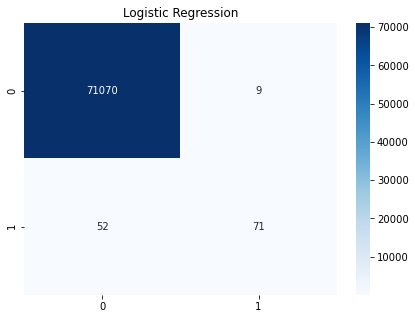

In [22]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_log), annot=True, cmap='Blues', fmt='d')
cm.set_title('Logistic Regression')
plt.show()

In [25]:
log = LogisticRegression(C=1, class_weight=None)
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [26]:
print_cross_val_result(cv)

Accuracy Score: 
0.9991526415580159

f1_score: 
0.7116392336093587

recall_score: 
0.607034431691966

Precision_Score: 
0.8627778700934234


In [27]:
log = LogisticRegression(C=0.1, class_weight=None)
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [28]:
print_cross_val_result(cv)

Accuracy Score: 
0.9991526415580159

f1_score: 
0.7106627138795389

recall_score: 
0.6042947056645687

Precision_Score: 
0.8660848539654799


In [29]:
log = LogisticRegression(C=10, class_weight=None)
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [30]:
print_cross_val_result(cv)

Accuracy Score: 
0.9991526415580159

f1_score: 
0.7116392336093587

recall_score: 
0.607034431691966

Precision_Score: 
0.8627778700934234


In [31]:
log = LogisticRegression(C=1, class_weight="balanced")
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [32]:
print_cross_val_result(cv)

Accuracy Score: 
0.9773928512909343

f1_score: 
0.12227341571793401

recall_score: 
0.9104776008885599

Precision_Score: 
0.06554921568832292


In [39]:
log = LogisticRegression(C=1, class_weight=None, solver="saga", penalty="l2")
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\skle

In [40]:
print_cross_val_result(cv)

Accuracy Score: 
0.9991385969429555

f1_score: 
0.6989578792986425

recall_score: 
0.5825990373935579

Precision_Score: 
0.8788923331933459


In [41]:
log = LogisticRegression(C=1, class_weight=None, solver="saga", penalty="l1")
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\skle

In [42]:
print_cross_val_result(cv)

Accuracy Score: 
0.9991385969429555

f1_score: 
0.6989578792986425

recall_score: 
0.5825990373935579

Precision_Score: 
0.8788923331933459


In [23]:
log = LogisticRegression(C=1, class_weight=None, solver="newton-cg", penalty="l2")
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [24]:
print_cross_val_result(cv)

Accuracy Score: 
0.9991526415580159

f1_score: 
0.7116392336093587

recall_score: 
0.607034431691966

Precision_Score: 
0.8627778700934234
